In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [ ]:
import pandas as pd

data1 = pd.read_csv("prabowo-1.csv")
data2 = pd.read_csv("prabowo-2.csv")
data3 = pd.read_csv("prabowo-3.csv")
data4 = pd.read_csv("prabowo-4.csv")

df = pd.concat([data1, data2, data3, data4], ignore_index=True)

# Eksplorasi Data

In [ ]:
df.shape

(9056, 15)

In [ ]:
total_rows = len(df)
print(f"Total jumlah baris dalam dataset: {total_rows}")

Total jumlah baris dalam dataset: 9056


In [ ]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1903865514310664621,Sun Mar 23 17:44:45 +0000 2025,0,Prabowo dan anak Presiden RI terdahulu rayakan...,1903865514310664621,https://pbs.twimg.com/media/Gmvjj9qbUAAieJV.png,NaN,in,Indonesia,0,0,0,https://x.com/webelshinta/status/1903865514310...,1482999200988434435,webelshinta
1,1903865458123755674,Sun Mar 23 17:44:31 +0000 2025,0,Eh akun yg countdown matinya prabowo udh ilang...,1903865458123755674,NaN,NaN,in,NaN,0,0,0,https://x.com/wongbijakasli/status/19038654581...,1566360618235351041,wongbijakasli
2,1903863218319278449,Sun Mar 23 17:44:27 +0000 2025,0,@msaid_didu @prabowo Di kasih masukan n ide2 b...,1903865440256086174,NaN,msaid_didu,in,NaN,0,0,0,https://x.com/abora3530/status/190386544025608...,1833866663533715457,abora3530
3,1903711938460422285,Sun Mar 23 17:44:24 +0000 2025,0,@Dyananjani89 @ardi_tama1 @BocorAlusPol Dari d...,1903865425097834779,NaN,Dyananjani89,in,Gyrus confusii,0,0,0,https://x.com/Carbaroxabane/status/19038654250...,1645820726187012097,Carbaroxabane
4,1903151942798545149,Sun Mar 23 17:44:03 +0000 2025,0,@halukinasi ngakak bro pikir dukung prabowo tp...,1903865339961901501,NaN,halukinasi,in,NaN,0,0,0,https://x.com/bengkoangrujak/status/1903865339...,1090341301948542976,bengkoangrujak


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9056 entries, 0 to 9055
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      9056 non-null   int64 
 1   created_at               9056 non-null   object
 2   favorite_count           9056 non-null   int64 
 3   full_text                9056 non-null   object
 4   id_str                   9056 non-null   int64 
 5   image_url                1500 non-null   object
 6   in_reply_to_screen_name  6063 non-null   object
 7   lang                     9056 non-null   object
 8   location                 3399 non-null   object
 9   quote_count              9056 non-null   int64 
 10  reply_count              9056 non-null   int64 
 11  retweet_count            9056 non-null   int64 
 12  tweet_url                9056 non-null   object
 13  user_id_str              9056 non-null   int64 
 14  username                 9056 non-null  

In [ ]:
df.describe()

,conversation_id_str,favorite_count,id_str,quote_count,reply_count,retweet_count,user_id_str
count,9.056000e+03,9056.000000,9.056000e+03,9056.000000,9056.000000,9056.000000,9.056000e+03
mean,1.899487e+18,50.913980,1.900791e+18,0.728136,1.092094,12.282354,1.223663e+18
std,3.897797e+16,1075.616611,3.832235e+15,19.429786,15.270299,323.772742,6.652044e+17
min,1.207674e+17,0.000000,1.878058e+18,0.000000,0.000000,0.000000,9.688522e+06
25%,1.896468e+18,0.000000,1.896491e+18,0.000000,0.000000,0.000000,9.838006e+17
50%,1.903238e+18,0.000000,1.903562e+18,0.000000,0.000000,0.000000,1.515592e+18
75%,1.903641e+18,0.000000,1.903761e+18,0.000000,0.000000,0.000000,1.701118e+18
max,1.913094e+18,51905.000000,1.913106e+18,1387.000000,645.000000,19788.000000,1.896941e+18


In [ ]:
print(df.isnull().sum())

conversation_id_str           0
created_at                    0
favorite_count                0
full_text                     0
id_str                        0
image_url                  7556
in_reply_to_screen_name    2993
lang                          0
location                   5657
quote_count                   0
reply_count                   0
retweet_count                 0
tweet_url                     0
user_id_str                   0
username                      0
dtype: int64


In [ ]:
df[df.in_reply_to_screen_name.isna()]

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1903865514310664621,Sun Mar 23 17:44:45 +0000 2025,0,Prabowo dan anak Presiden RI terdahulu rayakan...,1903865514310664621,https://pbs.twimg.com/media/Gmvjj9qbUAAieJV.png,NaN,in,Indonesia,0,0,0,https://x.com/webelshinta/status/1903865514310...,1482999200988434435,webelshinta
1,1903865458123755674,Sun Mar 23 17:44:31 +0000 2025,0,Eh akun yg countdown matinya prabowo udh ilang...,1903865458123755674,NaN,NaN,in,NaN,0,0,0,https://x.com/wongbijakasli/status/19038654581...,1566360618235351041,wongbijakasli
5,1903865322991735050,Sun Mar 23 17:43:59 +0000 2025,0,yg bikin aku ngomong kontol di dunia ini cuma ...,1903865322991735050,NaN,NaN,in,🌸🍶♡.⁺࿐˚･,0,1,0,https://x.com/vIyrical/status/1903865322991735050,1691129053812813824,vIyrical
7,1903865226652742069,Sun Mar 23 17:43:36 +0000 2025,0,gausah salahin prabowo salahin antek anteknya...,1903865226652742069,NaN,NaN,in,she/her,0,0,0,https://x.com/marellky/status/1903865226652742069,1296425561565229057,marellky
13,1903864989942980670,Sun Mar 23 17:42:40 +0000 2025,0,Anjeng orgil @prabowo,1903864989942980670,NaN,NaN,in,NaN,0,0,0,https://x.com/wongbijakasli/status/19038649899...,1566360618235351041,wongbijakasli
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8918,1912797508117647525,Thu Apr 17 09:17:18 +0000 2025,82,Saat dunia sedang tidak baik2 saja Allah memil...,1912797508117647525,https://pbs.twimg.com/ext_tw_video_thumb/19127...,NaN,in,NaN,4,74,26,https://x.com/BANGSAygSUJUD/status/19127975081...,1189039138835554304,BANGSAygSUJUD
8926,1899235396174889437,Mon Mar 10 23:06:19 +0000 2025,1118,PRABOWO HANYA PINTER OMON OMON SAJA. MANA GAK ...,1899235396174889437,https://pbs.twimg.com/ext_tw_video_thumb/18992...,NaN,in,"Jabodetabek, Indonesia",16,52,460,https://x.com/Andria75777/status/1899235396174...,1667233216091279363,Andria75777
8927,1887482083255222746,Thu Feb 06 12:42:51 +0000 2025,290,Hati2 kode KERAS Presiden @prabowo kpd siapapu...,1887482083255222746,https://pbs.twimg.com/ext_tw_video_thumb/18874...,NaN,in,NaN,7,91,58,https://x.com/BANGSAygSUJUD/status/18874820832...,1189039138835554304,BANGSAygSUJUD
8957,1910896800552136958,Sat Apr 12 03:24:34 +0000 2025,1,Prabowo ni sudah dibilang kalau punya trauma 9...,1910896800552136958,NaN,NaN,in,NaN,0,0,0,https://x.com/mikinoona/status/191089680055213...,769543787135643648,mikinoona


In [ ]:
print(df['in_reply_to_screen_name'].value_counts())

in_reply_to_screen_name
H4T14K4LN4L42      260
prabowo            219
BANGSAygSUJUD      129
agathadew_         115
ayundhaqh          110
                  ... 
valverdae            1
Jawalari1935         1
ikhtyrstwn           1
pancongmancur        1
humaniesproject      1
Name: count, Length: 1837, dtype: int64


# Data Cleaning

In [ ]:
print("Sebelum data dibersihkan:", df.shape)

Sebelum data dibersihkan: (9056, 15)


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df = df.dropna(subset=['in_reply_to_screen_name']) #menghapus data pada baris yang in_reply_to_screen_name nya kosong

In [ ]:
df = df[df['username'] != df['in_reply_to_screen_name']] #menghapus data pada baris yang user membalas dirinya sendiri

In [ ]:
print("Sesudah data dibersihkan:", df.shape)

Sesudah data dibersihkan: (5839, 15)


# Visualisasi Data

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

G = nx.from_pandas_edgelist(df, source='username', target='in_reply_to_screen_name', create_using=nx.DiGraph)

In [ ]:
print("- Jumlah simpul:", G.number_of_nodes())
print("- Jumlah sisi:", G.number_of_edges())

- Jumlah simpul: 5941
- Jumlah sisi: 5540


In [ ]:
G = nx.DiGraph()

# Tambahkan edge ke graph
for _, row in df.iterrows():
    G.add_edge(row['username'], row['in_reply_to_screen_name'])

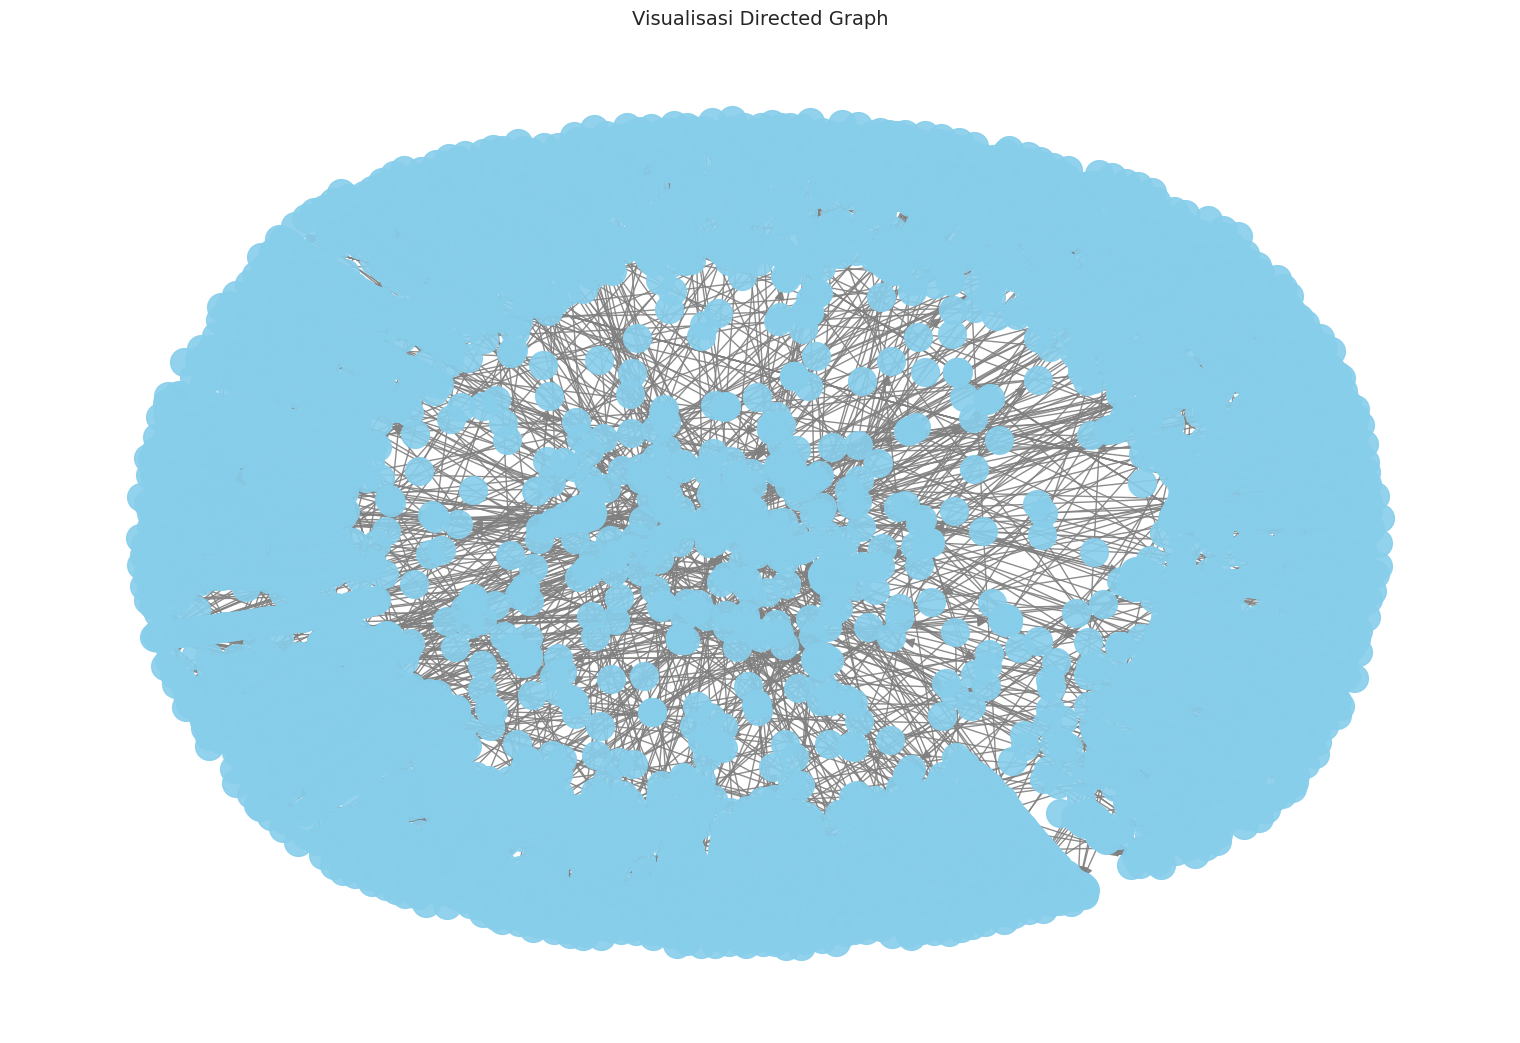

In [ ]:
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
G_sub = G.subgraph(list(G.nodes()))
pos = nx.spring_layout(G_sub, seed=42)

nx.draw(
    G_sub,
    pos,
    with_labels=False,
    node_size=400,
    node_color='skyblue',
    edge_color='gray',
    alpha=0.9,
    arrows=True,
    arrowsize=15,
    width=1
)

plt.title("Visualisasi Directed Graph", fontsize=14)
plt.axis('off')
plt.show()


# Eigenvector Centrality

In [ ]:
# Ambil komponen terbesar agar tidak error (harus strongly connected)
largest_cc = max(nx.strongly_connected_components(G), key=len)
G_sub = G.subgraph(largest_cc)

centrality = nx.eigenvector_centrality_numpy(G_sub)
df_centrality = pd.DataFrame(centrality.items(), columns=['user', 'eigenvector_centrality'])
df_centrality = df_centrality.sort_values(by='eigenvector_centrality', ascending=False)

df_centrality.head(10)

,user,eigenvector_centrality
1,BANGSAygSUJUD,0.685487
8,Kaum__Jelata,0.365632
3,nuka_minona,0.260238
5,Mawar___Merah,0.260238
0,1onto,0.260238
2,hunting_rejeki,0.260238
7,sammy10726838,0.260238
9,endonesiatwit,0.138808
4,MbiringD,0.138808
6,DIASPORA1808,0.138808


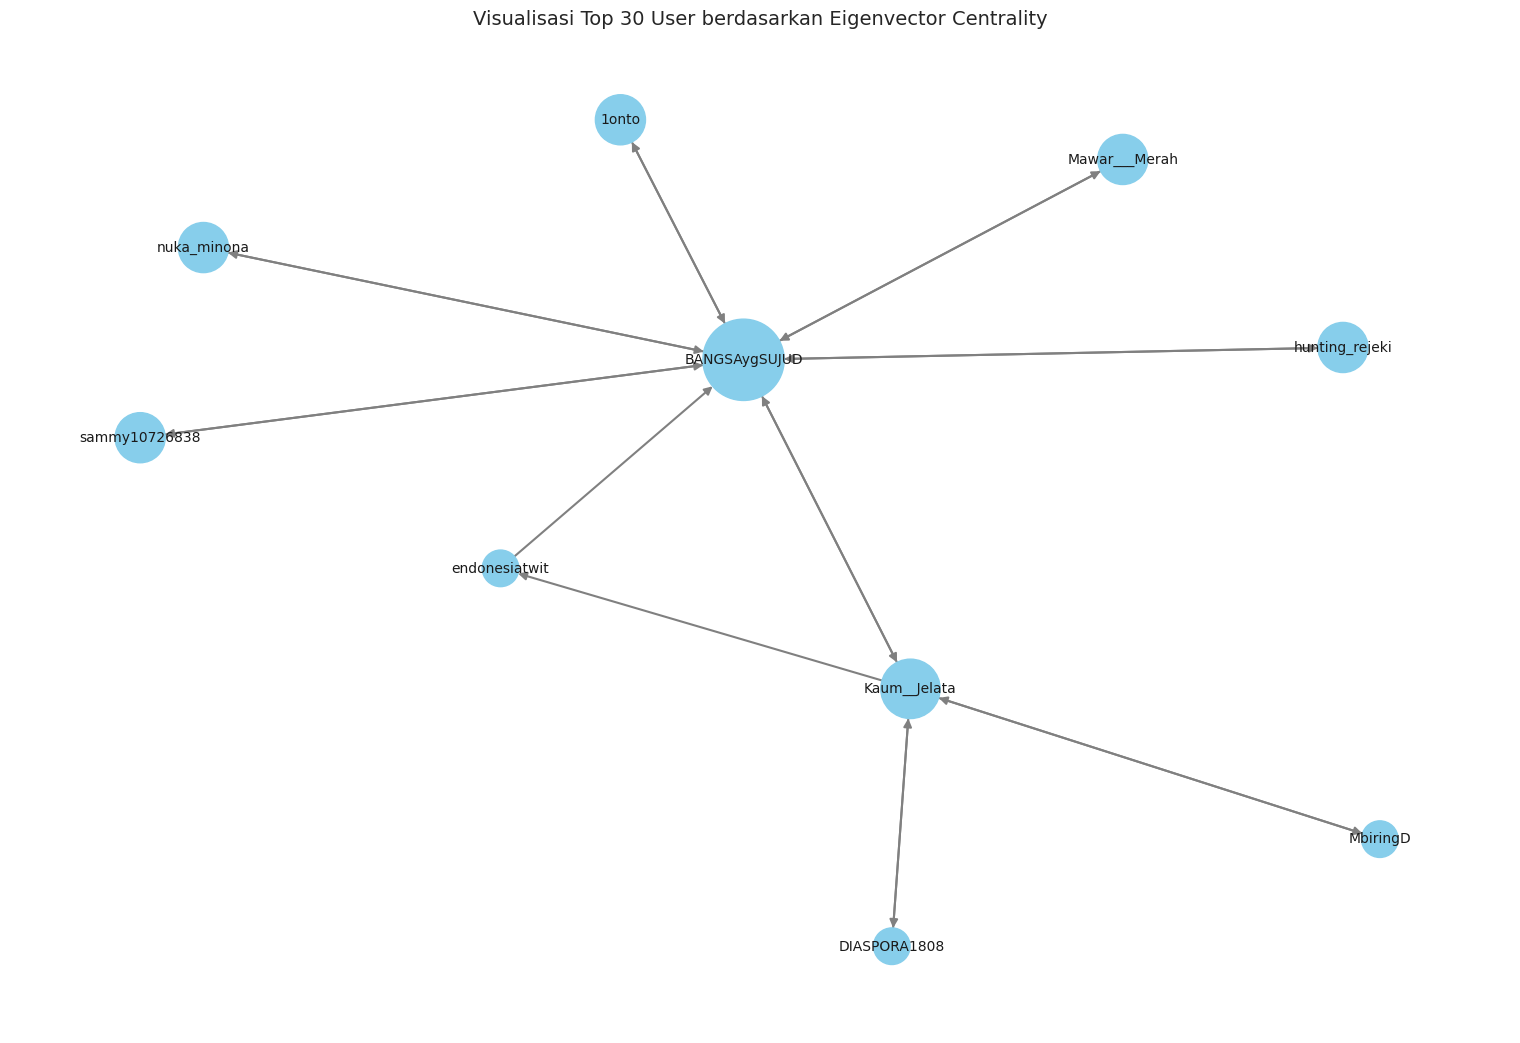

In [ ]:
# Ambil 10 user paling sentral
top10_users = df_centrality.head(10)['user'].tolist()
subgraph_top10 = G.subgraph(top10_users)

node_sizes = [centrality[node] * 5000 for node in subgraph_top10.nodes()]

sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(subgraph_top10, seed=42)

nx.draw(
    subgraph_top10,
    pos,
    with_labels=True,
    node_size=node_sizes,
    node_color='skyblue',
    edge_color='gray',
    font_size=10,
    arrows=True,
    arrowsize=12,
    width=1.5
)

plt.title("Visualisasi Top 30 User berdasarkan Eigenvector Centrality", fontsize=14)
plt.axis('off')
plt.show()


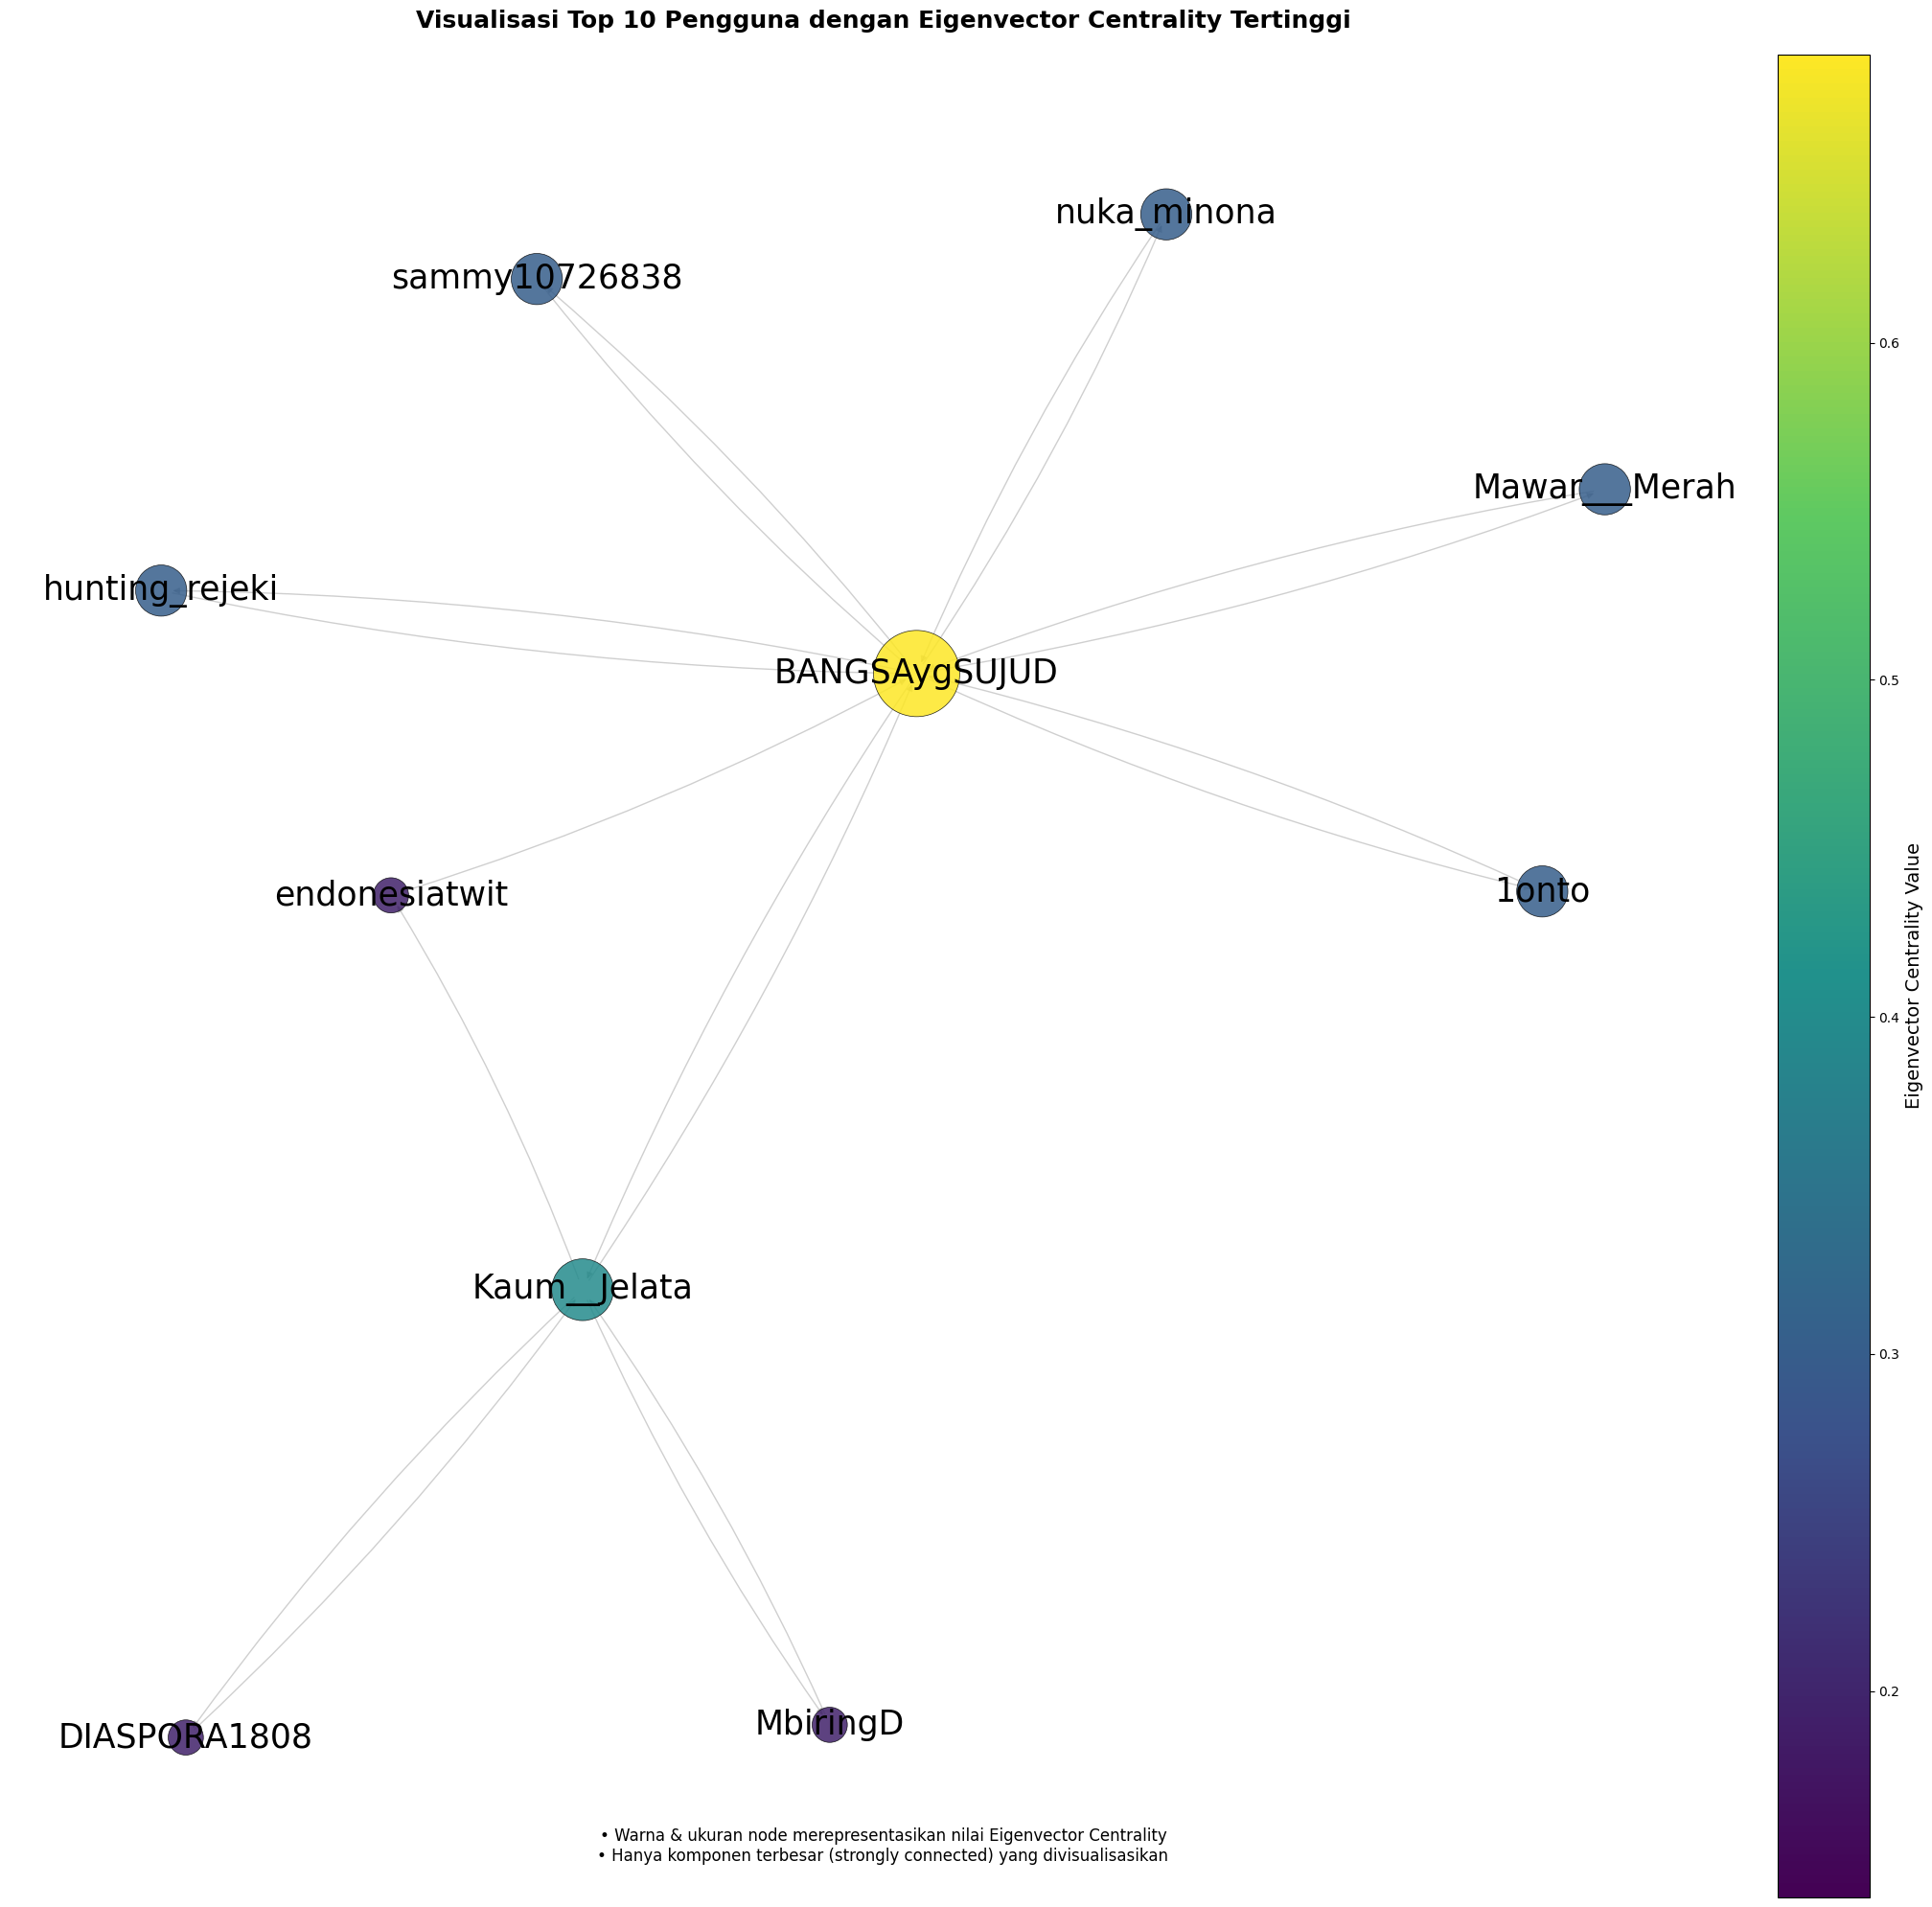

In [ ]:
# Layout untuk subgraph
pos = nx.spring_layout(G_sub, k=0.25, iterations=100, seed=42)

# Custom colormap
custom_cmap = LinearSegmentedColormap.from_list('custom_viridis',
                                                ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725'],
                                                N=256)

# Ambil nilai min dan max untuk normalisasi
min_centrality = df_centrality['eigenvector_centrality'].min()
max_centrality = df_centrality['eigenvector_centrality'].max()

# Buat ukuran dan warna node
node_sizes = []
node_colors = []
for node in G_sub.nodes():
    score = centrality.get(node, 0)
    norm = (score - min_centrality) / (max_centrality - min_centrality) if max_centrality > min_centrality else 0
    node_sizes.append(700 + 3500 * norm)
    node_colors.append(custom_cmap(0.1 + 0.9 * norm))

# Plot
fig, ax = plt.subplots(figsize=(22, 20))

# Edges
nx.draw_networkx_edges(G_sub, pos, alpha=0.4, edge_color="#888888", arrows=True,
                       arrowstyle='-|>', arrowsize=10, connectionstyle='arc3,rad=0.05', ax=ax)

# Nodes
nx.draw_networkx_nodes(G_sub, pos,
                       node_size=node_sizes,
                       node_color=node_colors,
                       edgecolors='black',
                       linewidths=0.5,
                       alpha=0.85, ax=ax)

# Optional: Label
if len(G_sub.nodes()) <= 100:
    nx.draw_networkx_labels(G_sub, pos, font_size=25)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=plt.Normalize(vmin=min_centrality, vmax=max_centrality))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('Eigenvector Centrality Value', fontsize=14, color='black')
cbar.ax.yaxis.set_tick_params(color='black')
cbar.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='black')

# Judul dan caption
ax.set_title("Visualisasi Top 10 Pengguna dengan Eigenvector Centrality Tertinggi", fontsize=18, fontweight='bold', pad=20)
ax.text(0.5, 0.02, "• Warna & ukuran node merepresentasikan nilai Eigenvector Centrality\n• Hanya komponen terbesar (strongly connected) yang divisualisasikan",
        horizontalalignment='center', color='black', transform=ax.transAxes, fontsize=12)

ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Buat directed graph
G = nx.from_pandas_edgelist(df, source='username', target='in_reply_to_screen_name', create_using=nx.DiGraph())

# Hitung komponen
strong_components = list(nx.strongly_connected_components(G))
weak_components = list(nx.weakly_connected_components(G))

# Ukuran masing-masing
strong_sizes = [len(c) for c in strong_components]
weak_sizes = [len(c) for c in weak_components]

print("Jumlah Strongly Connected Components:", len(strong_components))
print("Jumlah Weakly Connected Components:", len(weak_components))
print("Ukuran Strongest SCC:", max(strong_sizes))
print("Ukuran Weakest WCC:", max(weak_sizes))


Jumlah Strongly Connected Components: 5836
Jumlah Weakly Connected Components: 823
Ukuran Strongest SCC: 10
Ukuran Weakest WCC: 3046


<ipython-input-75-9a9f335f1bec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


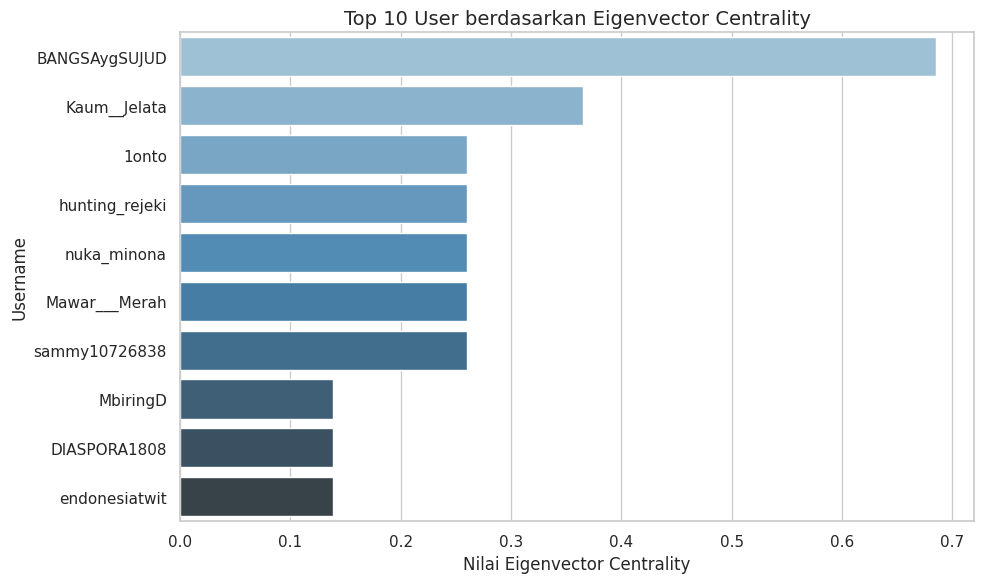

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = df_centrality.head(10).copy()

top10 = top10.sort_values(by='eigenvector_centrality', ascending=False)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(
    x='eigenvector_centrality',
    y='user',
    data=top10,
    palette='Blues_d'
)

plt.title("Top 10 User berdasarkan Eigenvector Centrality", fontsize=14)
plt.xlabel("Nilai Eigenvector Centrality")
plt.ylabel("Username")
plt.tight_layout()
plt.show()


# Kesimpulan

🔍 Interpretasi Eigenvector Centrality:

1. User dengan nilai tinggi = berpengaruh
*   Bukan cuma sering dibalas, tapi juga dibalas oleh user lain yang penting/berpengaruh.
*   Artinya, pengaruhnya menyebar melalui orang lain yang juga punya posisi penting di jaringan.


2. Tidak hanya soal kuantitas saja
*   Jika ada user yang cuma dibalas oleh sedikit orang, Tapi kalau orang-orang itu juga berpengaruh, nilai eigenvector-nya bisa tetap tinggi.

Dalam jaringan balasan Twitter pada topik ini, @BANGSAygSUJUD memiliki posisi paling sentral berdasarkan eigenvector centrality.
Ini mengindikasikan bahwa akun tersebut memiliki pengaruh struktural tinggi karena koneksinya dengan akun-akun lain yang juga berpengaruh.
Akun-akun lain dengan nilai tinggi juga bisa dianggap sebagai aktor penting dalam penyebaran informasi atau opini di jaringan ini.